# Exploatory Data Analysis - Stack Overflow Annual Developer Survey 2020

In the rapidly evolving landscape of technology and programming, insights into the preferences, trends, and demographics of developers can provide invaluable guidance for both professionals and organizations. The Stack Overflow Annual Survey is a treasure trove of data that offers a comprehensive snapshot of the global developer community. This exploratory data analysis (EDA) project delves into the intricate details of the Stack Overflow Annual Survey dataset, aiming to extract meaningful insights and uncover trends that shape the world of programming.

### Background:

With over millions of members, Stack Overflow stands as a prominent platform where developers of all levels converge to seek solutions, share knowledge, and engage in discussions. The annual Stack Overflow Developer Survey goes beyond individual coding queries, offering a comprehensive view of developers' habits, preferences, and professional lives. This dataset, spanning across years, contains a wealth of information about the tools they use, languages they prefer, salary expectations, job satisfaction, and much more. By analyzing this dataset, we can gain deeper insights into the evolving landscape of software development and the factors influencing developers' decisions.

### Objective:

The primary objective of this EDA project is to extract meaningful insights from the Stack Overflow Annual Survey dataset. By leveraging statistical analysis, data visualization techniques, and exploratory approaches, we aim to answer crucial questions such as:

* What are the most popular programming languages among developers worldwide?
* How does job satisfaction correlate with programming language preferences?
* What is the distribution of developer salaries across different countries?
* Are there any gender-based disparities in the tech industry?
* How have remote work trends evolved over the years?

### Methodology:

Our analysis involves a multi-step process. We'll start by loading and cleaning the dataset, handling missing values and outliers to ensure the integrity of our findings. We will then employ descriptive statistics to understand the basic characteristics of the data. Data visualization techniques such as bar charts, scatter plots, and heatmaps will help us present the information in a more understandable and visually appealing manner. Throughout this process, we'll remain vigilant for patterns, anomalies, and trends that could uncover hidden insights.

Let's start working on this project by importing some necessary libraries we are going to need.

In [1]:
# Import necessary dependencies

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The next step is to read the data, but first let's initialize the path where the data is stored.

In [2]:
# Define the data paths

SURVEY_RESULTS_PUBLIC = 'data/survey_results_public.csv'
SURVEY_RESULTS_SCHEMA = 'data/survey_results_schema.csv'

We have two csv files: `survey_results_public` and `survey_results_schema`. The `survey_results_public` contains our main data, and the `survey_results_schema` contains some descriptions of the variables. We will read csv files as our Panda Dataframe.

In [3]:
# Read the dataset

raw_survey_df = pd.read_csv(SURVEY_RESULTS_PUBLIC, index_col='Respondent')
raw_schema_df = pd.read_csv(SURVEY_RESULTS_SCHEMA, index_col='Column')

Since this dataset has a lot of columns, we can use Panda's `set_option` to display all the columns and rows.

In [4]:
# Setting display for rows and columns to max

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [5]:
raw_survey_df

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack

In [6]:
raw_schema_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
CompFreq,"Is that compensation weekly, monthly, or yearly?"
CompTotal,What is your current total compensation (salar...
ConvertedComp,Salary converted to annual USD salaries using ...
Country,Where do you live?


So that's how both our datasets look. Now let's get the shape of our datasets to know the number of rows and columns.

In [7]:
# Get the shape of df

raw_survey_df.shape

(64461, 60)

In [8]:
raw_schema_df.shape

(61, 1)

To display column names, we can either use the `.columns` or `.info()` methods. I like `.info()` because it also prints out some more information about the dataset, which is very helpful.

In [9]:
raw_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    64162 non-null  object 
 1   Hobbyist                      64416 non-null  object 
 2   Age                           45446 non-null  float64
 3   Age1stCode                    57900 non-null  object 
 4   CompFreq                      40069 non-null  object 
 5   CompTotal                     34826 non-null  float64
 6   ConvertedComp                 34756 non-null  float64
 7   Country                       64072 non-null  object 
 8   CurrencyDesc                  45472 non-null  object 
 9   CurrencySymbol                45472 non-null  object 
 10  DatabaseDesireNextYear        44070 non-null  object 
 11  DatabaseWorkedWith            49537 non-null  object 
 12  DevType                       49370 non-null  object 
 13  E

`raw_schema_df` is a Pandas DataFrame, and since it only has 1 column, I will convert that to a Series so I can easily access each index.

In [10]:
raw_schema_df = raw_schema_df.QuestionText

In [11]:
type(raw_schema_df)

pandas.core.series.Series

We can now easily check what every column in our main dataset means. These are the actual questions asked in the survey.

In [12]:
raw_schema_df['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [13]:
raw_schema_df['ConvertedComp']

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

Let's check if the data has NaN values.

In [14]:
raw_survey_df.isnull().sum()

MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToolsWorkedWith        11578
NEWDevOps   

It looks like the data is filled with a lot of missing values. Since it is real-world data, and real-world data often comes with a lot of missing values and abnormalities.

Since this data has a lot of columns, I will choose some important columns and limit my analysis to them to avoid distraction.

In [15]:
selected_columns = [
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt',
    'ConvertedComp'
]

In [16]:
len(selected_columns)

21

I have selected 21 columns from all 60. And now I will make copies of dataframes with selected columns.

In [17]:
survey_df = raw_survey_df[selected_columns].copy()

In [18]:
schema_df = raw_schema_df[selected_columns].copy()

In [19]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN
2,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN
3,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN
5,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,NaN


In [20]:
schema_df.head()

Column
Country                                          Where do you live?
Age               What is your age (in years)? If you prefer not...
Gender            Which of the following describe you, if any? P...
EdLevel           Which of the following best describes the high...
UndergradMajor                What was your primary field of study?
Name: QuestionText, dtype: object

In [21]:
type(schema_df)

pandas.core.series.Series

Let's now see if there are any abnormalities with the data.

In [22]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [23]:
schema_df['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [24]:
schema_df['YearsCode']

'Including any education, how many years have you been coding in total?'

In [25]:
schema_df['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

I found that some columns have invalid datatypes. For example, `Age1stCode`, `YearsCode`, and `YearsCodePro` should be in float or int, but they are strings.

So let's check for unique values in each of these columns.

In [26]:
survey_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [27]:
survey_df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [28]:
survey_df['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

All these columns mostly have number strings as uniques, but they also have some letter strings. For example, `Age1stCode` has `'Less than 1 year'` and `'More than 50 years'`. So we will have to replace them with numbers before changing their datatype to float, or it will cause an error.

In [29]:
survey_df['Age1stCode'].replace({'Younger than 5 years': '4', 'Older than 85': '86'}, inplace=True)
survey_df['YearsCode'].replace({'Less than 1 year': '0', 'More than 50 years': '50'}, inplace=True)
survey_df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '50'}, inplace=True)

I have replaced all letter strings in those columns with some number. For example, in the `YearsCode` column, I have replaced `'Less than 1 year'` with `'0'` and `'More than 50 years'` with `'50'`.

Now we can change their datatype to float. The reason we would want to change their datatype to float and not int is that these columns have nan values, and nan under the hood is a float datatype.

In [30]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'])
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'])
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'])

In [31]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  float64
 7   YearsCode               57684 non-null  float64
 8   YearsCodePro            46349 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Now we have 5 numerical features/columns. Let's get some statistical information about our numerical features. We can do that by using `.describe()`.

In [32]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,45446.000000,57900.000000,57684.000000,46349.000000,41151.000000,3.475600e+04
mean,30.834111,15.410345,12.706574,8.490906,40.782174,1.037561e+05
std,9.585392,5.292925,9.707707,7.900479,17.816383,2.268853e+05
min,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,24.000000,12.000000,6.000000,3.000000,40.000000,2.464800e+04
50%,29.000000,15.000000,10.000000,6.000000,40.000000,5.404900e+04
75%,35.000000,18.000000,17.000000,12.000000,44.000000,9.500000e+04
max,279.000000,86.000000,50.000000,50.000000,475.000000,2.000000e+06


It looks like the `Age` column has some invalid information. As we can see, the minimum value is `1` and the maximum is `279`. This often happens in surveys when people provide invalid information, either by mistake or intentionally. To solve this issue, we can just drop the values where the age is above 100 years or below 10 years.

In [33]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

There is the same issue with the `WorkWeekHrs` column, where the maximum value is `475`. So let's drop entries where the value is higher than 140 hours, which is 20 hours per day (in case someone is making a next-generation Facebook or something).

In [34]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [35]:
schema_df['Gender']

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [36]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

We have the `Gender` column, which has seven categories because the survey allowed respondents to select multiple categories as gender. I am not saying any of these categories are invalid, but to keep our analysis simple, I will consider all other categories as `'Non-binary, genderqueer, or gender non-conforming'`.

In [37]:
replace_dict =  {'Man;Non-binary, genderqueer, or gender non-conforming': 'Non-binary, genderqueer, or gender non-conforming',
                'Woman;Non-binary, genderqueer, or gender non-conforming': 'Non-binary, genderqueer, or gender non-conforming',
                'Woman;Man': 'Non-binary, genderqueer, or gender non-conforming', 
                'Woman;Man;Non-binary, genderqueer, or gender non-conforming': 'Non-binary, genderqueer, or gender non-conforming'}

survey_df['Gender'].replace(replace_dict, inplace=True)
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      696
Name: Gender, dtype: int64

Alright, we are done with data cleaning; now it's time to visualize our data using pretty graphs to get a better understanding of our data.

First, let's set some styling parameters.

In [38]:
sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [39]:
schema_df['Country']

'Where do you live?'

In [40]:
survey_df['Country'].nunique()

183

I am interested in visualizing from which country the largest number of survey respondents participated. As there are 183 countries, I will just select the top 15 countries.

In [41]:
top_countries = survey_df['Country'].value_counts().head(15)
top_countries

United States         12468
India                  8393
United Kingdom         3894
Germany                3879
Canada                 2189
France                 1893
Brazil                 1811
Netherlands            1340
Poland                 1263
Australia              1208
Spain                  1160
Italy                  1115
Russian Federation     1091
Sweden                  884
Pakistan                808
Name: Country, dtype: int64

To plot that, a bar plot would probably be a good option.

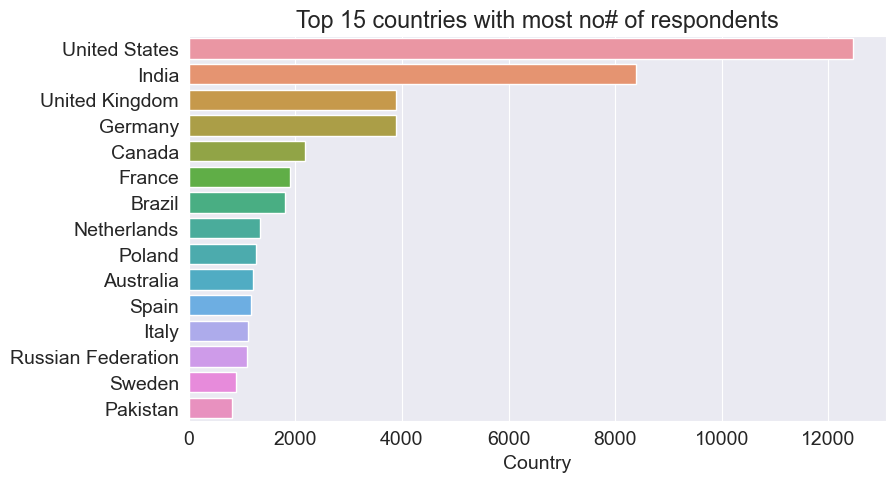

In [42]:
plt.title('Top 15 countries with most no# of respondents')
sns.barplot(x=top_countries, y=top_countries.index);

We can tell by looking at this bar plot that most respondents were from the United States, followed by India, and then the United Kingdom.

Now let's view the distribution of ages.

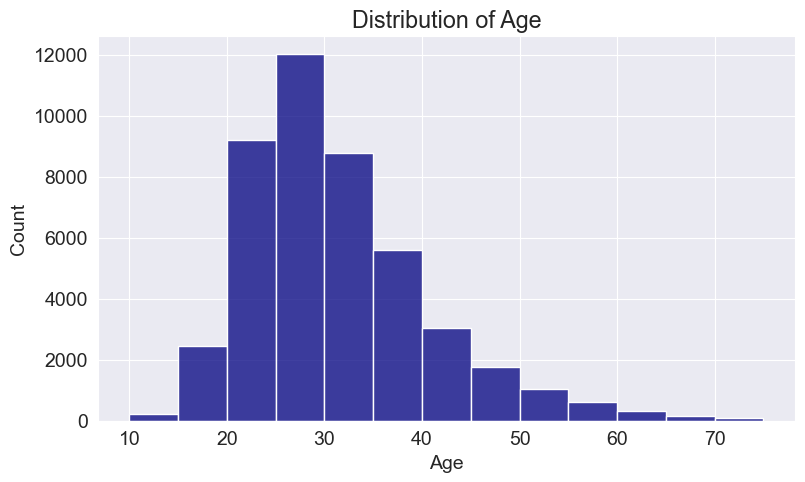

In [43]:
plt.title("Distribution of Age")
sns.histplot(survey_df['Age'], bins=np.arange(10,80,5), color='navy');

We can clearly see that most of the ages lie between 20 and 40. Let's make groups of ages and try to plot them for better visualization and understanding.

In [44]:
# Define the age groups and corresponding labels
age_bins = [10, 18, 30, 45, 60, 99]
age_labels = ['10-18 years', '18-30 years', '30-45 years', '45-60 years', 'Older than 60 years']

# Create a new column 'AgeGroup' based on the 'Age' column
survey_df['AgeGroup'] = pd.cut(survey_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Getting percentange of 'AgeGroup'
agegroup_pct = survey_df['AgeGroup'].value_counts() * 100 / survey_df['AgeGroup'].count()

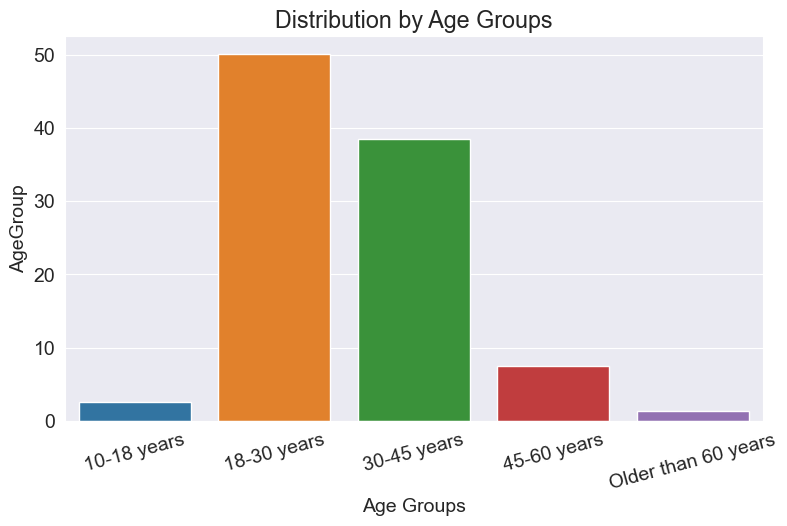

In [45]:
sns.barplot(x=agegroup_pct.index, y=agegroup_pct)

plt.xlabel('Age Groups')
plt.xticks(rotation=15)
plt.title('Distribution by Age Groups');

Now it's more clear that almost 50% of ages are between 18 and 30, and a little less than 40% are between 30 and 45.

It would be interesting to know the gender distribution. We can plot the distribution by using the pie chart.

In [46]:
gender_counts = survey_df['Gender'].value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      696
Name: Gender, dtype: int64

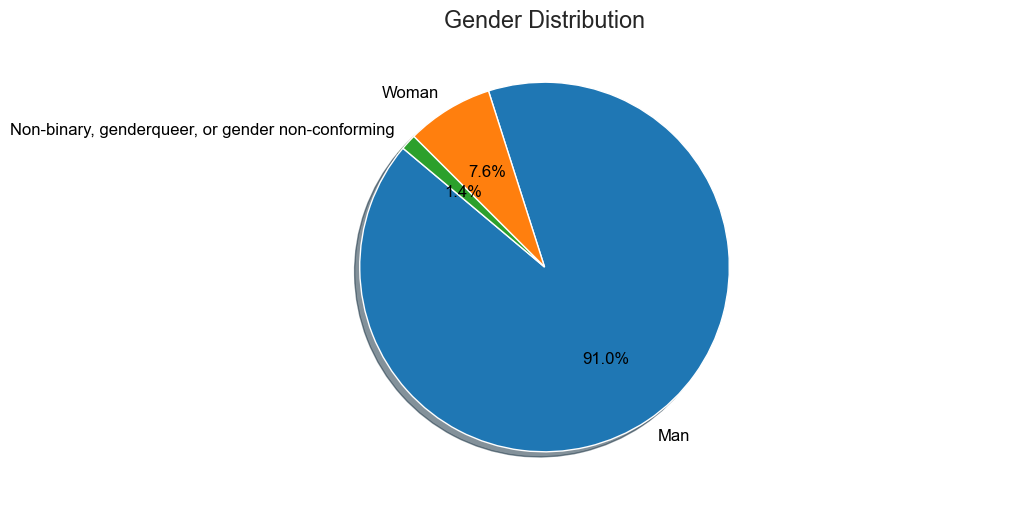

In [47]:
# Create a figure and axis with a larger size and equal aspect ratio
plt.figure(figsize=(12,6))
plt.axis('equal');  # Ensures the pie chart is a circle

# Create the pie chart with various customizations
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},  # Add white borders to the wedges
    shadow=True,  # Add a shadow for depth
    textprops={'fontsize': 12, 'color': 'black'}  # Customize label font size and color
);

# Title and legend
plt.title("Gender Distribution");

# plt.legend(gender_counts.index)

We can clearly see the gender imbalance as 91% are men and only 7.6% are women.

Now let's plot the education levels of respondents.

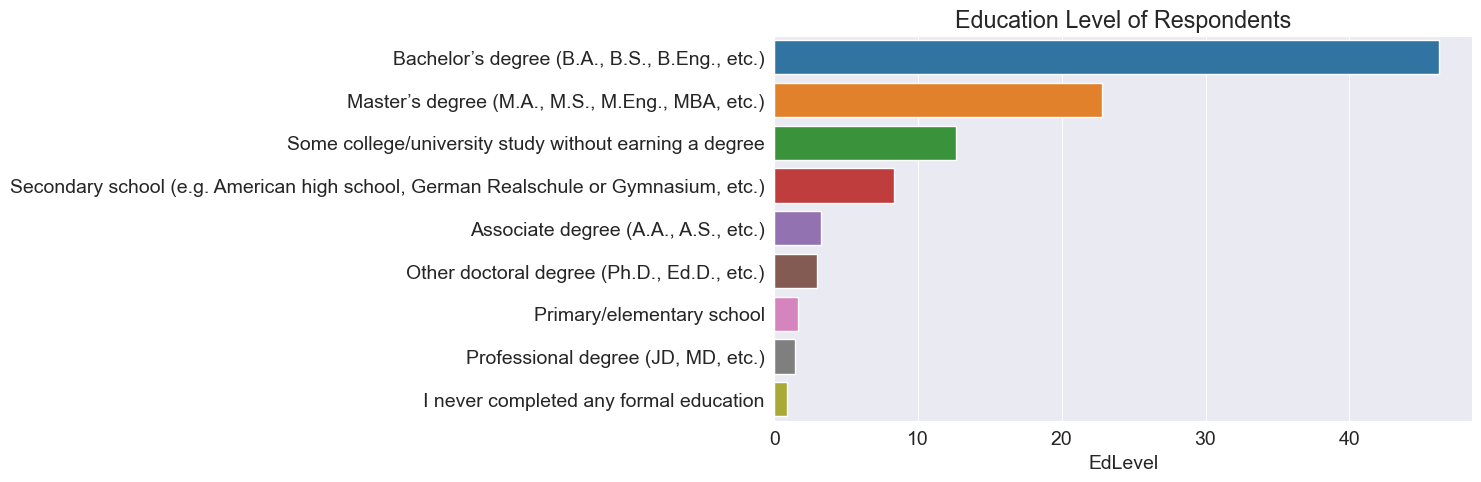

In [48]:
edlevel_pct = survey_df['EdLevel'].value_counts() * 100 / survey_df['EdLevel'].count()

sns.barplot(x=edlevel_pct, y=edlevel_pct.index)
plt.title('Education Level of Respondents');

It makes sense and somewhat represents the programming community, as we can see that most of the respondents who participated in the survey had a bachelor's degree. However, it doesn't prove that it is necessary to have a college degree to pursue a career in programming. In fact, we can tell by looking at the plot that more than 10% of respondents didn't have any college degrees.

Now it would be great if we could plot education level with respect to gender and see how education level compares between men and women. Let's try to do that.

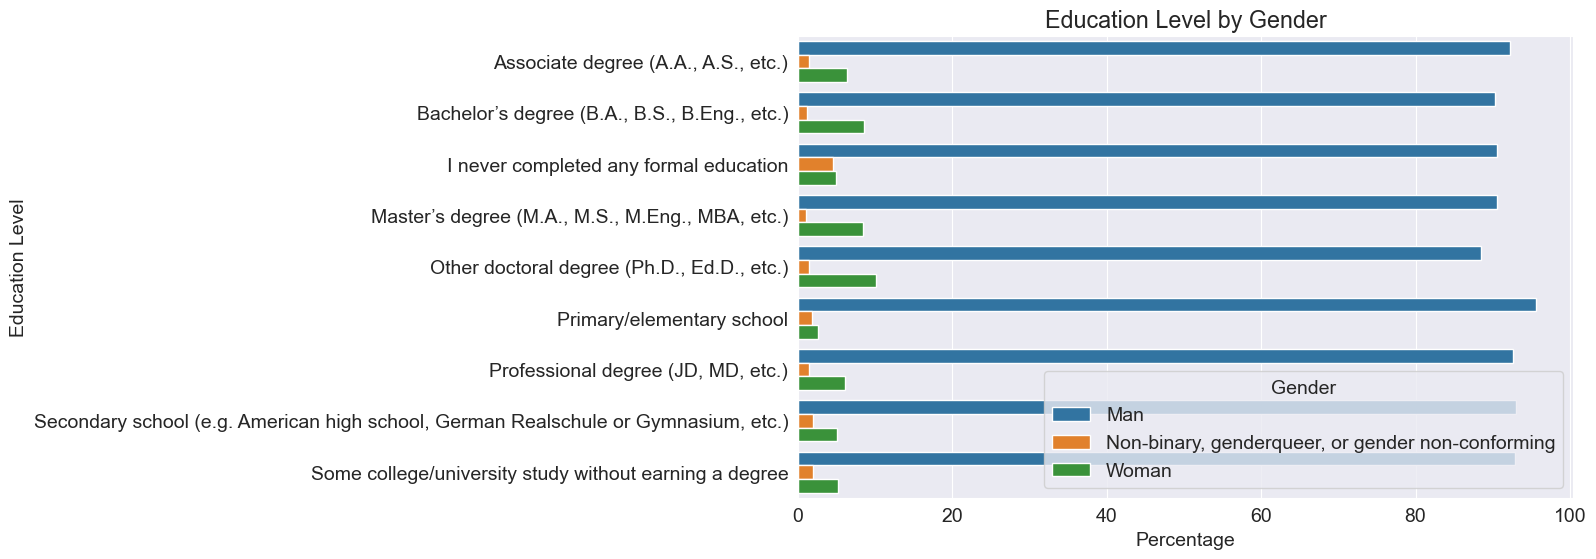

In [49]:
# Calculate the percentages for each degree and gender combination
edlevel_gender_counts = survey_df.groupby(['EdLevel', 'Gender']).size().unstack()
edlevel_gender_pct = edlevel_gender_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Reset the index for easier plotting
edlevel_gender_pct = edlevel_gender_pct.reset_index()

# Melt the DataFrame for plotting
edlevel_gender_melted = pd.melt(edlevel_gender_pct, id_vars=['EdLevel'], var_name='Gender', value_name='Percentage')

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=edlevel_gender_melted, x='Percentage', y='EdLevel', hue='Gender')
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.title('Education Level by Gender')
plt.show()

In [50]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      696
Name: Gender, dtype: int64

Umm, now this graph is very misleading because our gender column is unbalanced, as value counts for men are way higher than for women. So we will be able to better plot if we can balance those values first.

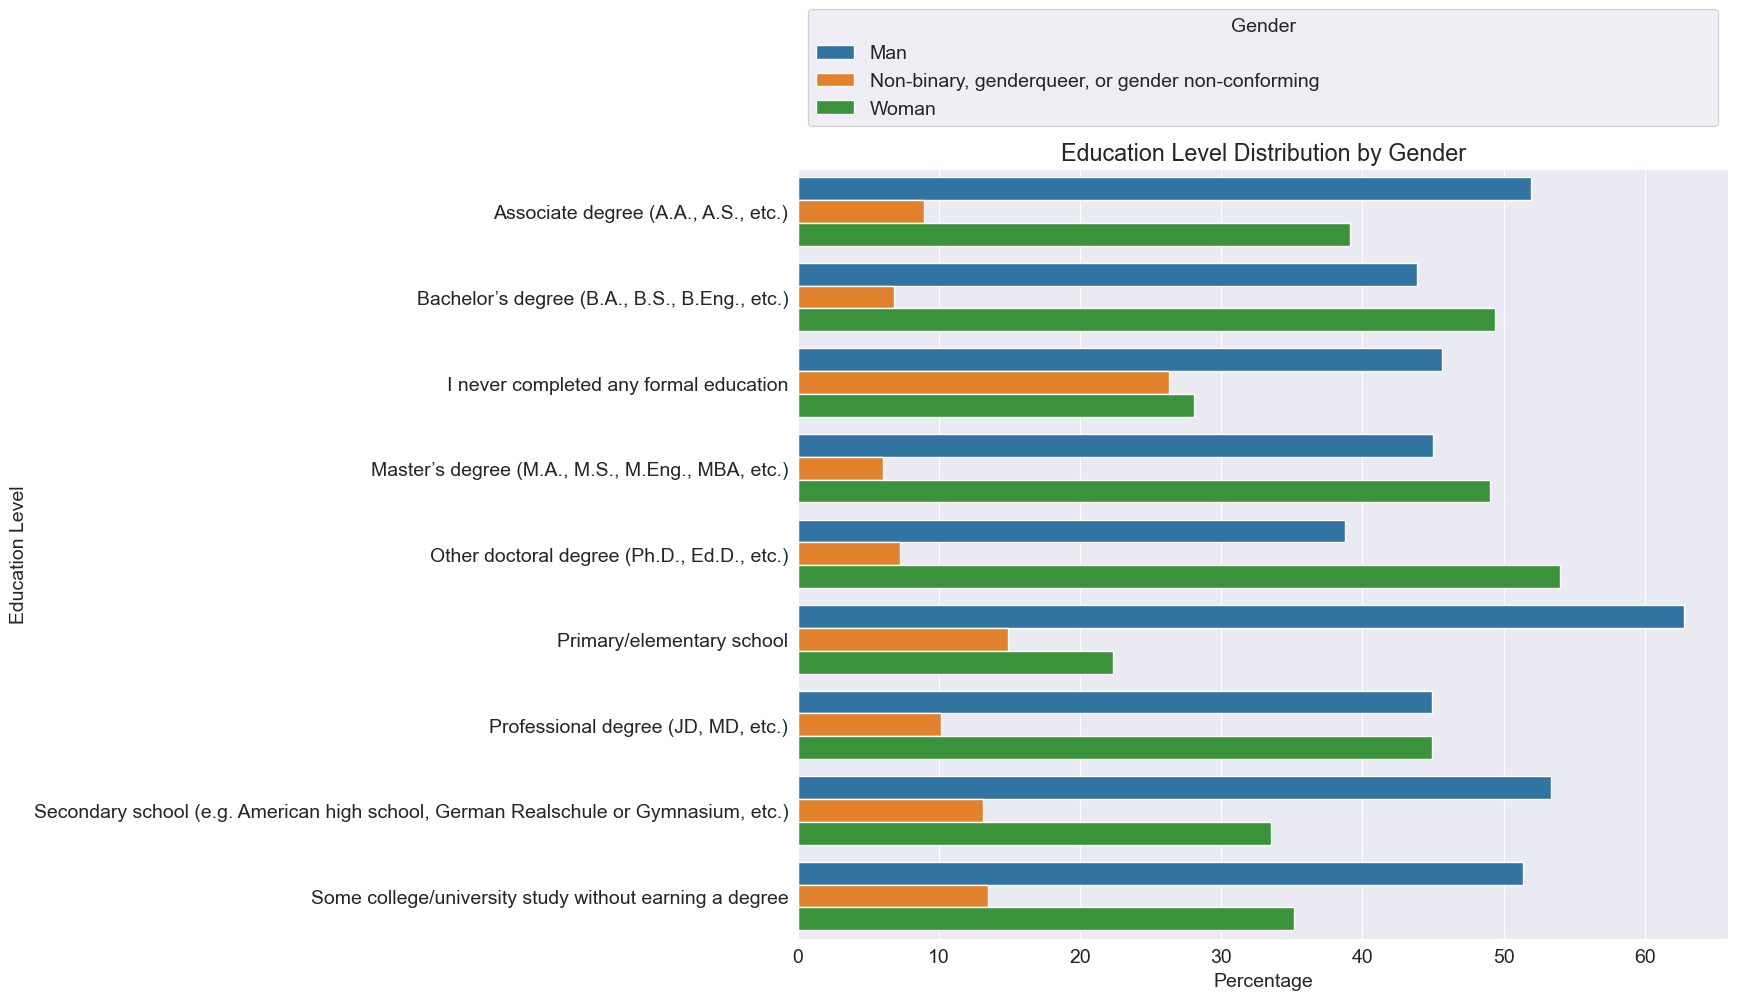

In [51]:
# Balancing the number of samples for "Man" and "Woman"
num_samples = 3835
balanced_man_data = survey_df[survey_df['Gender'] == 'Man'].sample(n=num_samples, replace=True)
balanced_df = pd.concat([balanced_man_data, survey_df[survey_df['Gender'] != 'Man']], ignore_index=True)

# Calculate the percentages for each degree and gender combination
edlevel_gender_counts = balanced_df.groupby(['EdLevel', 'Gender']).size().unstack()
edlevel_gender_pct = edlevel_gender_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Reset the index for easier plotting
edlevel_gender_pct = edlevel_gender_pct.reset_index()

# Melt the DataFrame for plotting
edlevel_gender_melted = pd.melt(edlevel_gender_pct, id_vars=['EdLevel'], var_name='Gender', value_name='Percentage')

# Plot the barplot
plt.figure(figsize=(12, 10))
sns.barplot(data=edlevel_gender_melted, x='Percentage', y='EdLevel', hue='Gender')
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.title('Education Level Distribution by Gender')
plt.legend(title='Gender', loc='upper left', mode='expand', bbox_to_anchor=(0, 1.02, 1, 0.2))
plt.show()

Now that it's better, we can see that the education level of women is higher than that of men in bachelor's and master's degrees.

Let's see if there are any salary differences with respect to gender.

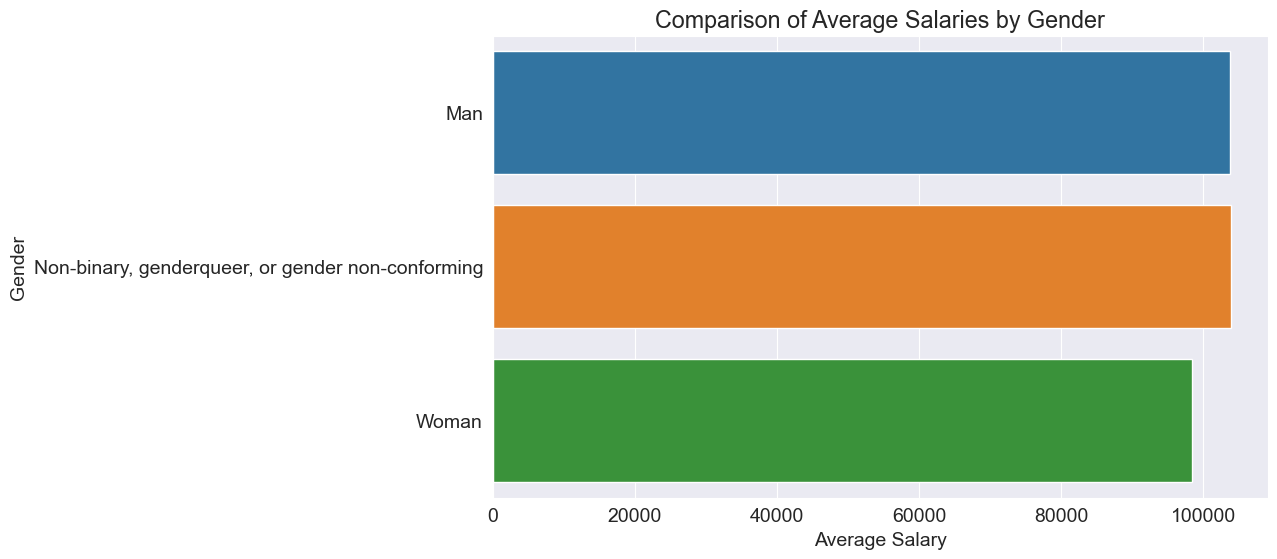

In [52]:
# Calculate the average salaries for each gender
average_salaries = survey_df.groupby('Gender')['ConvertedComp'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_salaries, x='ConvertedComp', y='Gender')
plt.xlabel('Average Salary')
plt.title('Comparison of Average Salaries by Gender')
plt.show()

It doesn't look like there is much of a salary difference with respect to gender.

Now let's plot the primary fields of study of the respondents.

In [53]:
schema_df['UndergradMajor']

'What was your primary field of study?'

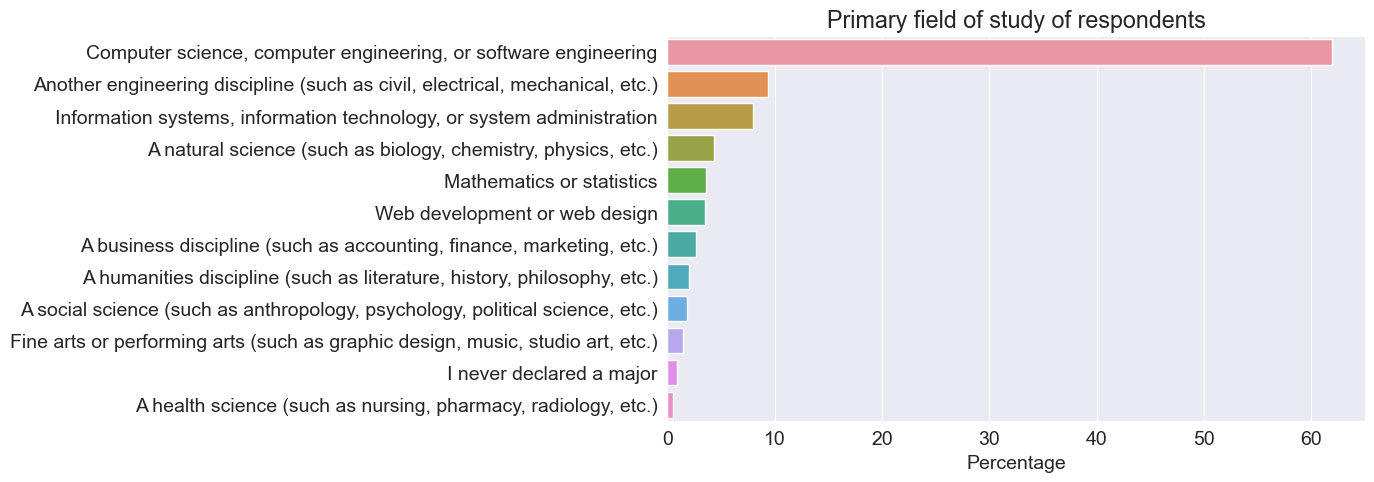

In [54]:
undergrad_pct = survey_df['UndergradMajor'].value_counts() *100 / survey_df['UndergradMajor'].count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index);

plt.title('Primary field of study of respondents')
plt.xlabel('Percentage');

As expected, the majority of respondents had computer science as their primary field of study. But we can also see that more than **35%** of respondents had other majors as their primary field of study. So it can also be encouraging for people who have a primary field of study other than computer science and want to pursue programming.

Next, let's try to visualize employment status.

In [55]:
schema_df['Employment']

'Which of the following best describes your current employment status?'

In [56]:
survey_df['Employment'].value_counts()

Employed full-time                                      45142
Student                                                  7785
Independent contractor, freelancer, or self-employed     5651
Not employed, but looking for work                       2343
Employed part-time                                       2214
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

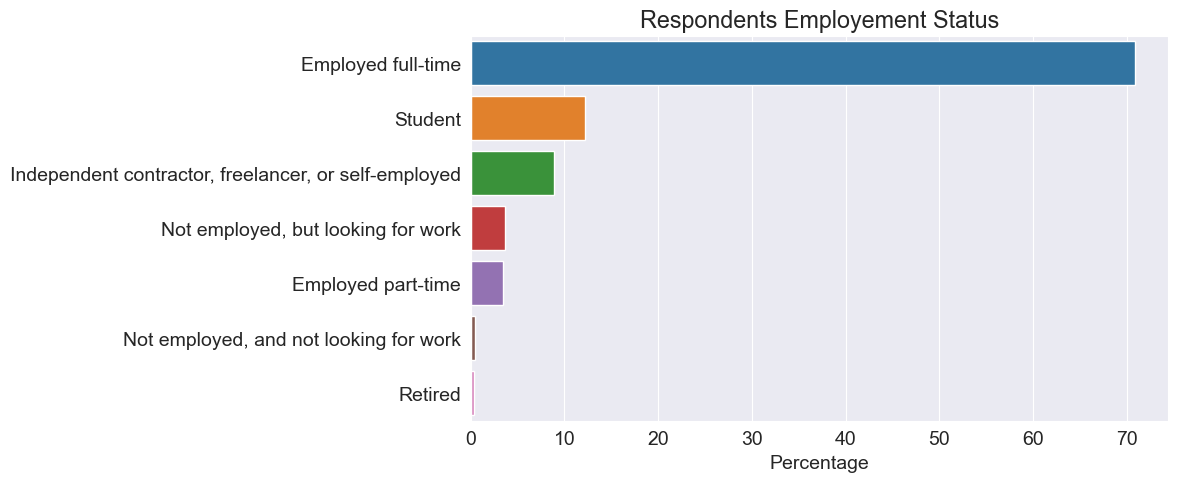

In [57]:
employement_pct =  survey_df['Employment'].value_counts() *100 / survey_df['Employment'].count()

sns.barplot(x=employement_pct, y=employement_pct.index);

plt.title('Respondents Employement Status')
plt.xlabel('Percentage');

The plot tells us that more than 70% are employed full-time. 

In [58]:
schema_df['DevType']

'Which of the following describe you? Please select all that apply.'

In [59]:
len(survey_df['DevType'].value_counts())

8255

In [60]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [61]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [62]:
dev_type_df.head()

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
Respondent,,,,,,,,,,,,,,,,,,,,,,,
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              27137
Developer, full-stack                            27046
Developer, front-end                             18230
Developer, desktop or enterprise applications    11742
Developer, mobile                                 9447
DevOps specialist                                 5949
Database administrator                            5697
Designer                                          5307
System administrator                              5221
Developer, embedded applications or devices       4729
Data or business analyst                          4008
Data scientist or machine learning specialist     3974
Developer, QA or test                             3926
Engineer, data                                    3729
Academic researcher                               3534
Educator                                          2916
Developer, game or graphics                       2778
Engineering manager                               2714
Product ma

In [64]:
# Calculate the total count
total_count = dev_type_df.sum().sum()

# Calculate the percentage for each developer type
dev_type_pct = (dev_type_df.sum() / total_count) * 100

# Sort the percentages in descending order
dev_type_pct_sorted = dev_type_pct.sort_values(ascending=False)

# Print the sorted percentages
print(dev_type_pct_sorted)

Developer, back-end                              17.336170
Developer, full-stack                            17.278035
Developer, front-end                             11.646032
Developer, desktop or enterprise applications     7.501246
Developer, mobile                                 6.035111
DevOps specialist                                 3.800452
Database administrator                            3.639465
Designer                                          3.390318
System administrator                              3.335378
Developer, embedded applications or devices       3.021069
Data or business analyst                          2.560466
Data scientist or machine learning specialist     2.538746
Developer, QA or test                             2.508081
Engineer, data                                    2.382230
Academic researcher                               2.257656
Educator                                          1.862854
Developer, game or graphics                       1.7746

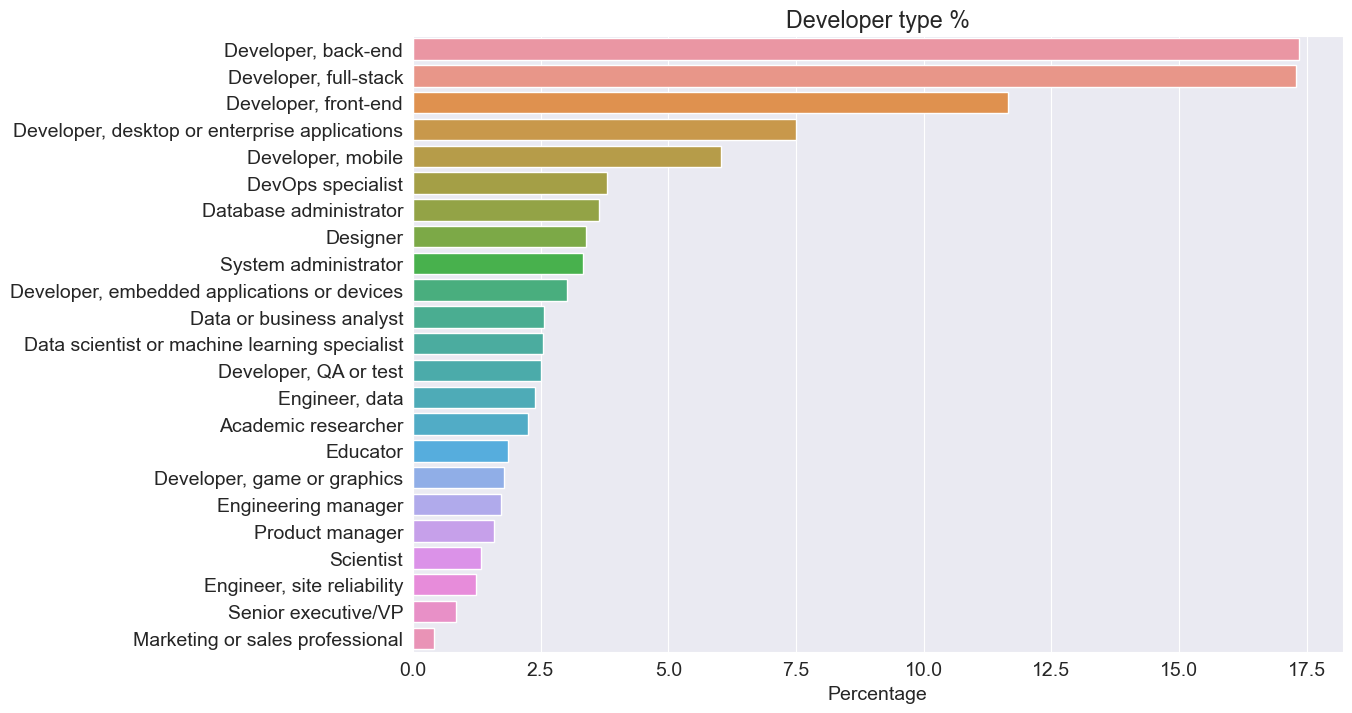

In [65]:
plt.figure(figsize=(12,8))

sns.barplot(x=dev_type_pct_sorted, y=dev_type_pct_sorted.index)
plt.title('Developer type %')
plt.xlabel('Percentage');

In [66]:
schema_df['LanguageWorkedWith']

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [67]:
survey_df['LanguageWorkedWith']

Respondent
1                                   C#;HTML/CSS;JavaScript
2                                         JavaScript;Swift
3                                 Objective-C;Python;Swift
4                                                      NaN
5                                        HTML/CSS;Ruby;SQL
                               ...                        
64858                                                  NaN
64867    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64898                                                  NaN
64925                                             HTML/CSS
65112                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [68]:
languageworkedwith_df = split_multicolumn(survey_df['LanguageWorkedWith'])

In [69]:
languageworkedwith_df.head()

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,C,TypeScript,Bash/Shell/PowerShell,Kotlin,R,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,
1,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
languageworkedwith_pct = languageworkedwith_df.mean().sort_values(ascending=False) * 100
languageworkedwith_pct

JavaScript               60.222996
HTML/CSS                 56.123845
SQL                      48.717072
Python                   39.243616
Java                     35.789817
Bash/Shell/PowerShell    29.445153
C#                       27.974062
PHP                      23.266880
TypeScript               22.596647
C++                      21.263957
C                        19.371443
Go                        7.815756
Kotlin                    6.930924
Ruby                      6.279352
Assembly                  5.504930
VBA                       5.422511
Swift                     5.268560
R                         5.097503
Rust                      4.548565
Objective-C               3.626411
Dart                      3.534662
Scala                     3.176997
Perl                      2.782011
Haskell                   1.894069
Julia                     0.800858
dtype: float64

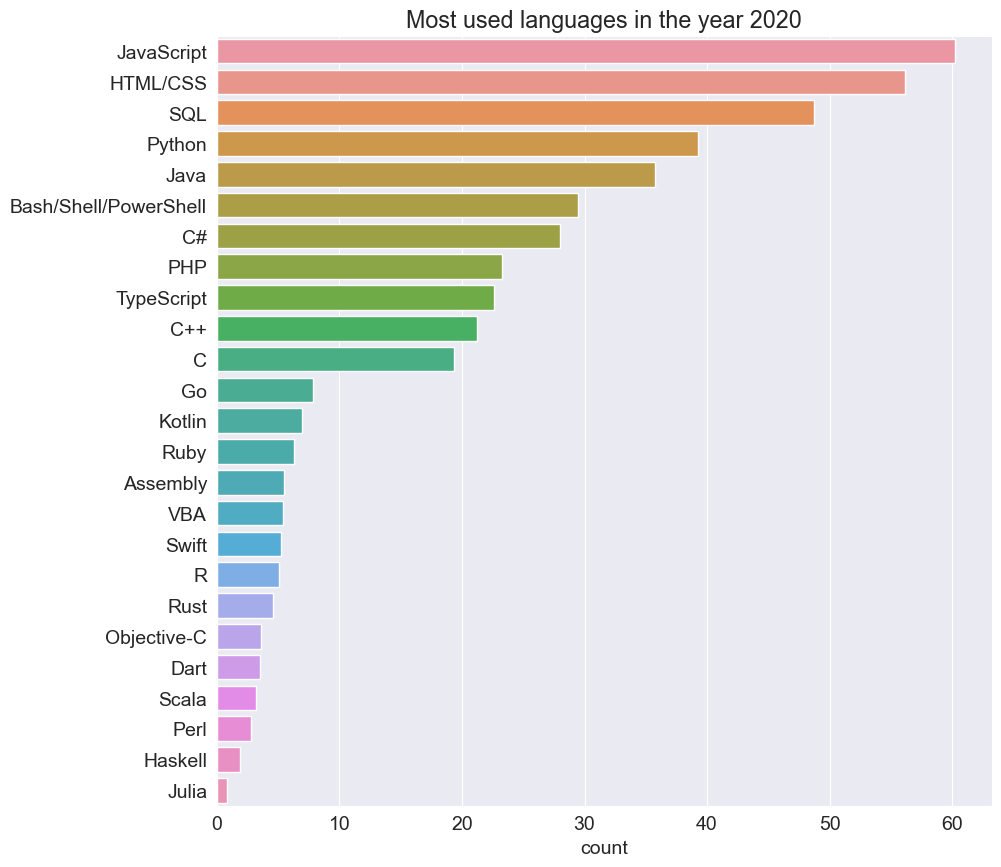

In [71]:
plt.figure(figsize=(10, 10))

sns.barplot(x=languageworkedwith_pct, y=languageworkedwith_pct.index)
plt.title("Most used languages in the year 2020");
plt.xlabel('count');

In [72]:
languages_interested_df = split_multicolumn(survey_df['LanguageDesireNextYear'])
languages_interested_pct = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_pct

Python                   41.400491
JavaScript               40.636955
HTML/CSS                 32.208503
SQL                      30.981557
TypeScript               26.590054
C#                       21.197089
Java                     20.573508
Go                       19.545610
Bash/Shell/PowerShell    18.183373
Rust                     16.401269
C++                      15.130781
Kotlin                   14.843094
PHP                      11.020745
C                         9.442354
Swift                     8.747240
Dart                      7.353902
R                         6.627686
Ruby                      6.492396
Scala                     5.368084
Haskell                   4.648089
Assembly                  3.822349
Julia                     2.572077
Objective-C               2.362144
Perl                      1.782104
VBA                       1.632818
dtype: float64

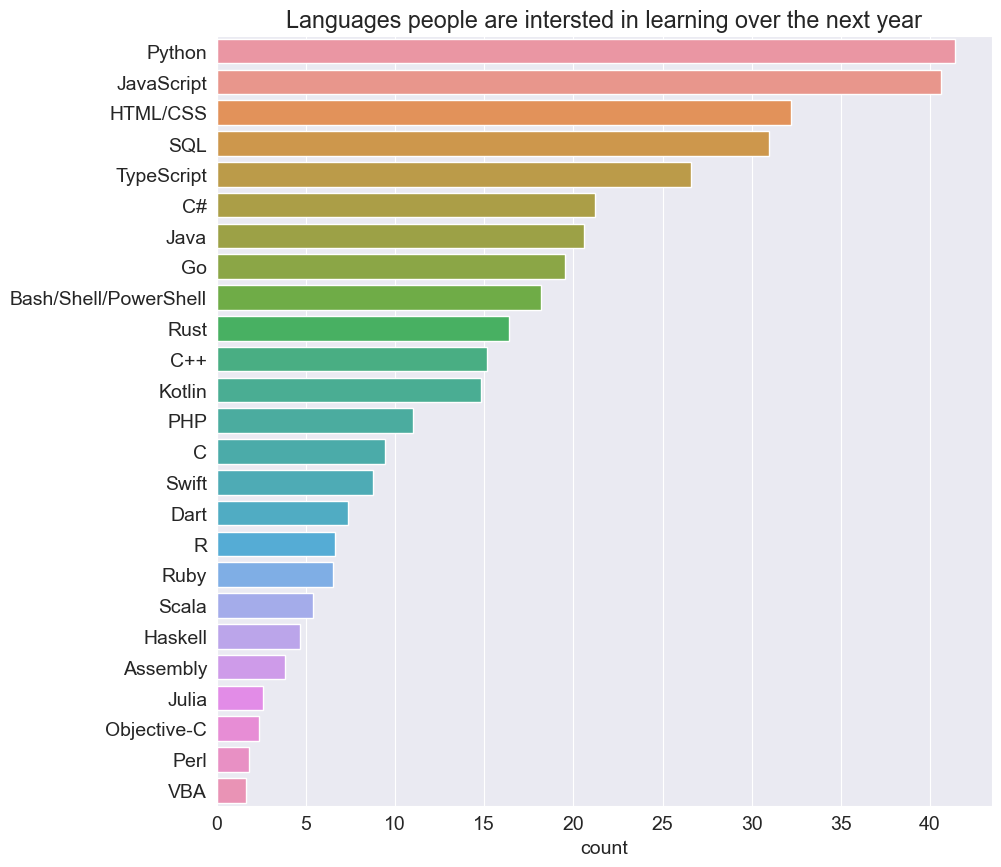

In [73]:
plt.figure(figsize=(10, 10))

sns.barplot(x=languages_interested_pct, y=languages_interested_pct.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

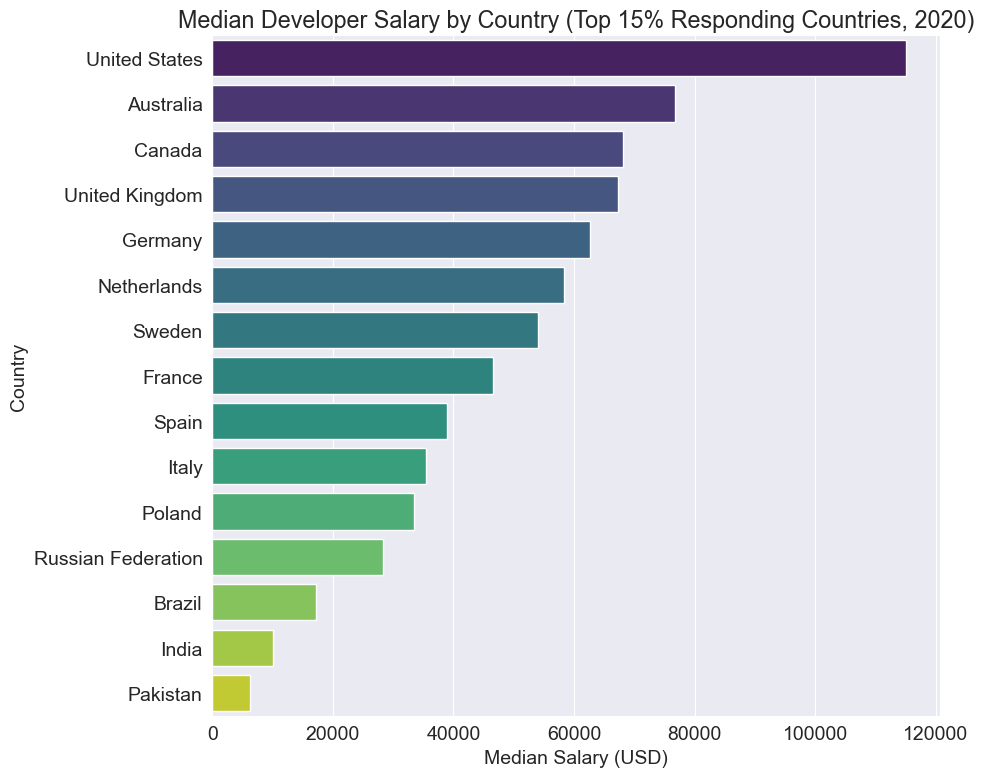

In [74]:
# Filter data for top countries
data_top_countries = survey_df[survey_df['Country'].isin(top_countries.index)]

# Group data by country and calculate median salary
country_salary_data = data_top_countries.groupby('Country')['ConvertedComp'].median()

# Sort countries by median salary
country_salary_data = country_salary_data.sort_values(ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=country_salary_data.values, y=country_salary_data.index, palette='viridis')
plt.xlabel('Median Salary (USD)')
plt.ylabel('Country')
plt.title('Median Developer Salary by Country (Top 15% Responding Countries, 2020)')
plt.tight_layout();

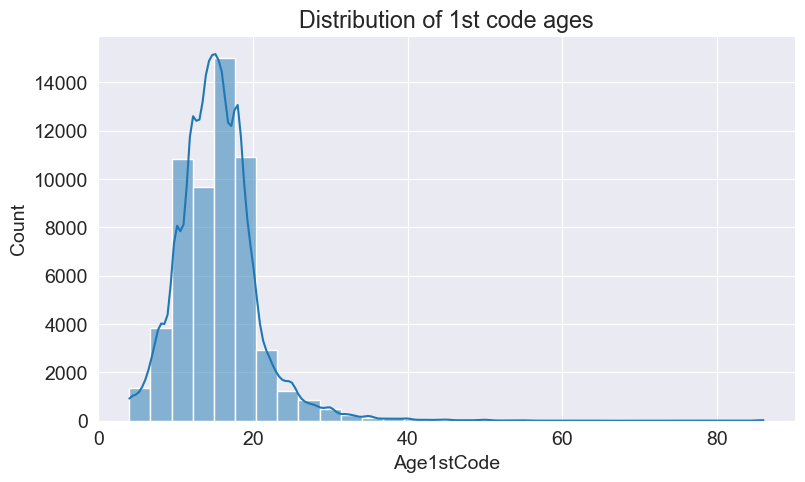

In [75]:
plt.title('Distribution of 1st code ages')
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);